## ================ Muti-layer Perceptron (Boston dataset)  ===================
st8_Zhang_Dong_code

Created on 30th June, Wed, 2021

- To predict the crime rate in each town
- regression problem

### please read the readme.txt file first.

In [1]:
# import packages
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.exceptions import ConvergenceWarning
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# always print floating point numbers using fixed point notation
np.set_printoptions(suppress=True)

# set plotting style
plt.style.use('ggplot')

# import warnings filter
from warnings import simplefilter

# ignore all future warnings and Convergence Warning
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=ConvergenceWarning)

In [122]:
# load data
# set the first row as head
df = pd.read_csv('../Boston.csv', header=0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [123]:
# convert a pandas Dataframe to numpy array
df = np.array(df)
# get the length of dataset
nums = df.shape[1]
# display the demo of dataset
print('The first three rows of the dataset:\n', df[:3,:])
print('\nThe total columns of dataset is: {}'.format(nums))

The first three rows of the dataset:
 [[  0.00632  18.        2.31      0.        0.538     6.575    65.2
    4.09      1.      296.       15.3     396.9       4.98     24.     ]
 [  0.02731   0.        7.07      0.        0.469     6.421    78.9
    4.9671    2.      242.       17.8     396.9       9.14     21.6    ]
 [  0.02729   0.        7.07      0.        0.469     7.185    61.1
    4.9671    2.      242.       17.8     392.83      4.03     34.7    ]]

The total columns of dataset is: 14


In [6]:
# Modify df in-place by shuffling its contents.
np.random.shuffle(df)

# split the dataset: train_set & test_set
ratio = 0.8
offset = int(df.shape[0] * ratio)

train_data = df[:offset]

# normalize data
std = train_data.std(axis=0)
mean = train_data.mean(axis=0)

for i in range(nums):
    # x <- (x-u)/s
    df[:, i] = (df[:, i] - mean[i]) / (std[i])

train_data = df[:offset]
test_data = df[offset:]

# make the first column "crim" as the target
X_train = train_data[:, 1:]  # training set: data
y_train = train_data[:, 0]   # training set: target
X_test = test_data[:, 1:]    # testing set: data
y_test = test_data[:, 0]     # testing set: target

In [7]:
print('The shape of X_train: ', X_train.shape)
print(X_train[0])

The shape of X_train:  (404, 13)
[ 2.87289688 -1.11410711 -0.24569789 -1.35072865 -0.72669909 -1.32866646
  1.31982978 -0.62467427 -0.42196392 -1.10741199  0.44785197 -0.34771846
 -0.33185355]


In [8]:
print('The shape of y_train: ', y_train.shape)
print(y_train[0])

The shape of y_train:  (404,)
-0.4112072095096379


In [9]:
print('The shape of X_test ', X_test.shape)
print(X_test[0])

The shape of X_test  (102, 13)
[ 0.34420099 -1.02656556 -0.24569789  0.82307079  3.14394604  0.83813192
 -0.73892971 -0.50949015 -0.85546656 -2.55483714  0.33700688 -0.97202781
  3.0104883 ]


In [10]:
print('The shape of  y_test: ', y_test.shape)
print(y_test[0])

The shape of  y_test:  (102,)
-0.3492427489288772


### ===================== Multilayer perceptron ======================

In [11]:
# MLP model
# alpha_l1: the alpha for L1 regularization
# alpha_l2: the alpha for L2 regularization
# to set alpha_l1=0 and alpha_l2=0, so there is no regularization used in the model
model_regression = MLPRegressor(alpha_l1 = 0.0, alpha_l2=0.0)
# Train the model
model_regression.fit(X_train, y_train)

# train set
# expected_x = y_train
# predicted_x = model_regression.predict(X_train)
# print('MLP: The R2 score for training set is: ', metrics.r2_score(expected_x, predicted_x))
# print('MLP: MSE on training set:', metrics.mean_squared_error(expected_x, predicted_x))
# print('')

# test set
expected_y = y_test
predicted_y = model_regression.predict(X_test)
print('MLP: The R2 score for testing is: ', metrics.r2_score(expected_y, predicted_y))
print('MLP: MSE on testing set:', metrics.mean_squared_error(expected_y, predicted_y))

MLP: The R2 score for testing is:  0.3711755841952298
MLP: MSE on testing set: 1.3721419147093252


### ================== Multilayer perceptron with Lasso ===================

In [68]:
# train alpha_l1
# create an empty list to store training result
l1_param_train = [[], [], []]   # alpha_l1, score_l1_R2, score_l1_RME
l1_param_test = [[], [], []]   # alpha_l1, score_l1_R2, score_l1_RME

expected_l1_x = y_train
expected_l1_y = y_test

# Here, the idea of grid search is applied to train Lasso model 
# to find the optimal alpha value in the interval of (0,2]
# step length is 0.1
for alpha_train_l1 in range(1,21):
    # using Grid Search to search the best alpha in [0,2]
    # MLP model with L1 penalty
    # in lasso model, set alpha_l2 = 0.0
    mlp_l1 = MLPRegressor(alpha_l1 = alpha_train_l1*0.1, alpha_l2=0.0)
    mlp_l1.fit(X_train, y_train)
    
    # training set
    predicted_l1_x = mlp_l1.predict(X_train)
    s_l1_train_r2 = metrics.r2_score(expected_l1_x, predicted_l1_x)
    s_l1_train_mse = metrics.mean_squared_error(expected_l1_x, predicted_l1_x)
    # append training results to the l1_param_train
    l1_param_train[0].append(alpha_train_l1*0.1)
    l1_param_train[1].append(s_l1_train_r2)
    l1_param_train[2].append(s_l1_train_mse)
    
    # testing set
    predicted_l1_y = mlp_l1.predict(X_test)
    s_l1_test_r2 = metrics.r2_score(expected_l1_y, predicted_l1_y)
    s_l1_test_mse = metrics.mean_squared_error(expected_l1_y, predicted_l1_y)
    # append testing results to the l1_param_test
    l1_param_test[0].append(alpha_train_l1*0.1)
    l1_param_test[1].append(s_l1_test_r2)
    l1_param_test[2].append(s_l1_test_mse)
    

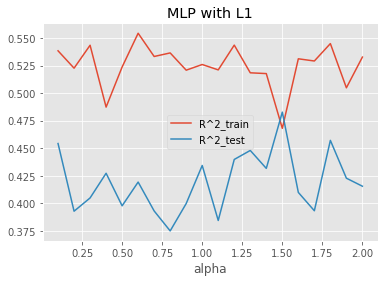

In [69]:
%matplotlib inline
# plot alpha vs. R^2
plt.title('MLP with L1')
plt.plot(l1_param_train[0], l1_param_train[1], label='R^2_train')
plt.plot(l1_param_train[0], l1_param_test[1],  label='R^2_test')
plt.xlabel("alpha")
plt.legend()
plt.show()

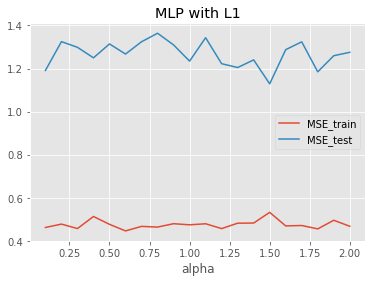

In [70]:
%matplotlib inline
# plot alpha vs. RMSE
plt.title('MLP with L1')
plt.plot(l1_param_train[0], l1_param_train[2], label='MSE_train')
plt.plot(l1_param_train[0], l1_param_test[2],  label='MSE_test')
plt.xlabel("alpha")
plt.legend()
plt.show()

In [71]:
# print the result of MLP_l1 on testing data in (0,2]
l1_param_test = np.array(l1_param_test)
# get the index of minimun mse
# R^2 = (1-SSR)/SST, so R^2 is maximum when MSE is minimum
a_l1_test = np.argmin(l1_param_test, axis=1)
# print(a_l1_test)
print('The best result for MLP with L1 regularization: \nalpha_l1 = {} \nR^2 = {} \nMSE = {}'
      .format(l1_param_test[0][a_l1_test[2]], l1_param_test[1][a_l1_test[2]], l1_param_test[2][a_l1_test[2]]))

The best result for MLP with L1 regularization: 
alpha_l1 = 1.5 
R^2 = 0.4827289986666282 
MSE = 1.1287240195417974


### ====================== MLP with Ridge ======================

In [88]:
# train alpha_l2
# create an empty list to store training result
l2_param_train = [[], [], []]   # alpha_l2, score_l2_R2, score_l2_RME
l2_param_test = [[], [], []]   # alpha_l2, score_l2_R2, score_l2_RME

expected_l2_x = y_train
expected_l2_y = y_test

# grid search
# to find the optimal alpha value in the interval of (0,2]
# step length is 0.1
for alpha_train_l2 in range(1,21):
    # using Grid Search to search the best alpha in [0,2]
    # MLP model with L1 penalty
    # in ridge model, set alpha_l1 = 0.0
    mlp_l2 = MLPRegressor(alpha_l1 = 0.0, alpha_l2=alpha_train_l2*0.1)
    mlp_l2.fit(X_train, y_train)
    
    # training set
    predicted_l2_x = mlp_l2.predict(X_train)
    s_l2_train_r2 = metrics.r2_score(expected_l2_x, predicted_l2_x)
    s_l2_train_mse = metrics.mean_squared_error(expected_l2_x, predicted_l2_x)
     # append training results to the l2_param_train
    l2_param_train[0].append(alpha_train_l2*0.1)
    l2_param_train[1].append(s_l2_train_r2)
    l2_param_train[2].append(s_l2_train_mse)
    
    # testing set
    predicted_l2_y = mlp_l2.predict(X_test)
    s_l2_test_r2 = metrics.r2_score(expected_l2_y, predicted_l2_y)
    s_l2_test_mse = metrics.mean_squared_error(expected_l2_y, predicted_l2_y)
    # append testing results to the l2_param_train
    l2_param_test[0].append(alpha_train_l2*0.1)
    l2_param_test[1].append(s_l2_test_r2)
    l2_param_test[2].append(s_l2_test_mse)

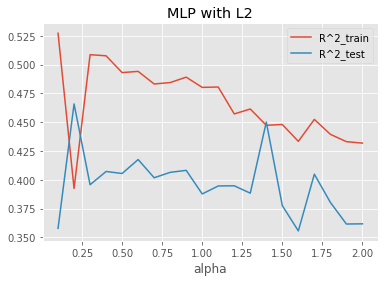

In [89]:
%matplotlib inline
# plot alpha vs. R^2
plt.title('MLP with L2')
plt.plot(l2_param_train[0], l2_param_train[1], label='R^2_train')
plt.plot(l2_param_train[0], l2_param_test[1],  label='R^2_test')
plt.xlabel("alpha")
plt.legend()
plt.show()

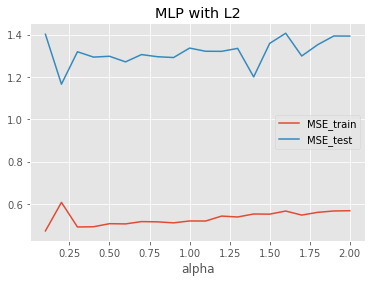

In [90]:
%matplotlib inline
# plot alpha vs. RMSE
plt.title('MLP with L2')
plt.plot(l2_param_train[0], l2_param_train[2], label='MSE_train')
plt.plot(l2_param_train[0], l2_param_test[2],  label='MSE_test')
plt.xlabel("alpha")
plt.legend()
plt.show()

In [91]:
# print the result of MLP_l2 on testing data in [0,2]
l2_param_test = np.array(l2_param_test)
# get the index of minimun mse
a_l2_test = np.argmin(l2_param_test, axis=1)
# print(a_l2_test)
print('The best result for MLP with L2 regularization: \nalpha_l2 = {} \nR^2 = {} \nMSE = {}'
      .format(l2_param_test[0][a_l2_test[2]], l2_param_test[1][a_l2_test[2]], l2_param_test[2][a_l2_test[2]]))

The best result for MLP with L2 regularization: 
alpha_l2 = 0.2 
R^2 = 0.46581838112957386 
MSE = 1.16562425201212


### ============== MLP with elastic net ================

In [92]:
# train alpha_l1_l2
# create an empty list to store training result
l1_l2_param_train = [[], [], [], []]   # alpha_l1_l2, score_l1_l2_R2, score_l1_l2_RME
l1_l2_param_test = [[], [], [], []]   # alpha_l1_l2, score_l1_l2_R2, score_l1_l2_RME

expected_l1_l2_x = y_train
expected_l1_l2_y = y_test

# grid search
# to find the optimal alpha value in the interval of (0,2]
# step length is 0.1

for alpha_l1 in range(1,21):
    for alpha_l2 in range(1,21):
        # using Grid Search to search the best alpha in [0,2]
        # MLP model with L1 & L2 penalty
        mlp_l1_l2 = MLPRegressor(alpha_l1=alpha_l1*0.1, alpha_l2=alpha_l2*0.1)
        mlp_l1_l2.fit(X_train, y_train)
        
        # training set
        predicted_l1_l2_x = mlp_l1_l2.predict(X_train)
        s_l1_l2_train_r2 = metrics.r2_score(expected_l1_l2_x, predicted_l1_l2_x)
        s_l1_l2_train_mse = metrics.mean_squared_error(expected_l1_l2_x, predicted_l1_l2_x)
        # append training results to the l1_l2_param_train
        l1_l2_param_train[0].append(alpha_l1*0.1)
        l1_l2_param_train[1].append(alpha_l2*0.1)
        l1_l2_param_train[2].append(s_l1_l2_train_r2)
        l1_l2_param_train[3].append(s_l1_l2_train_mse)

        # testing set
        predicted_l1_l2_y = mlp_l1_l2.predict(X_test)
        s_l1_l2_test_r2 = metrics.r2_score(expected_l1_l2_y, predicted_l1_l2_y)
        s_l1_l2_test_mse = metrics.mean_squared_error(expected_l1_l2_y, predicted_l1_l2_y)
        # append testing results to the l1_l2_param_test
        l1_l2_param_test[0].append(alpha_l1*0.1)
        l1_l2_param_test[1].append(alpha_l2*0.1)
        l1_l2_param_test[2].append(s_l1_l2_test_r2)
        l1_l2_param_test[3].append(s_l1_l2_test_mse)

In [93]:
# you can save the result to a local .csv file by the following code
# np.savetxt("MLP_L1&L2_Boston.csv", l1_l2_param_test.T, delimiter =",",fmt ='% s')

In [94]:
# print the result of MLP_l1_l2 on testing data in [0,2]
l1_l2_param_test = np.array(l1_l2_param_test)
a_l1_l2_test = np.argmin(l1_l2_param_test, axis=1)
# print(a_l1_l2_test)
print('The best result for MLP with L1&L2 regularization: \nalpha_l1 = {} \nalpha_l2 = {} \nR^2 = {} \nMSE = {}'
      .format(l1_l2_param_test[0][a_l1_l2_test[3]], l1_l2_param_test[1][a_l1_l2_test[3]], 
              l1_l2_param_test[2][a_l1_l2_test[3]], l1_l2_param_test[3][a_l1_l2_test[3]]))

The best result for MLP with L1&L2 regularization: 
alpha_l1 = 1.8 
alpha_l2 = 0.4 
R^2 = 0.5036476607113174 
MSE = 1.083077934132689


Text(0.5, 0, 'alpha_l1')

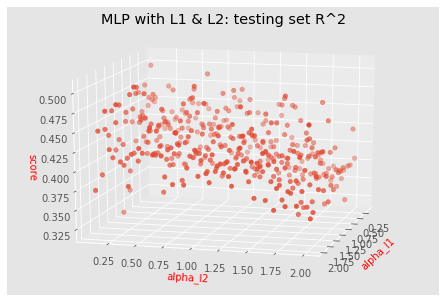

In [95]:
# plot the result of MLP with L1&L2 regularization
%matplotlib inline
fig = plt.figure()
ax = Axes3D(fig)

plt.rcParams['axes.unicode_minus']=False # to make "-" show normally

# plotting
surf = ax.scatter(l1_l2_param_test[0],l1_l2_param_test[1],l1_l2_param_test[2],cmap="Blues")
# plt.colorbar(surf, shrink=0.5, aspect=5)
plt.title('MLP with L1 & L2: testing set R^2')
ax.view_init(elev=15, azim=15)
ax.set_zlabel('score', fontdict={'size': 10, 'color': 'red'})
ax.set_ylabel('alpha_l2', fontdict={'size': 10, 'color': 'red'})
ax.set_xlabel('alpha_l1', fontdict={'size': 10, 'color': 'red'})


Text(0.5, 0, 'alpha_l1')

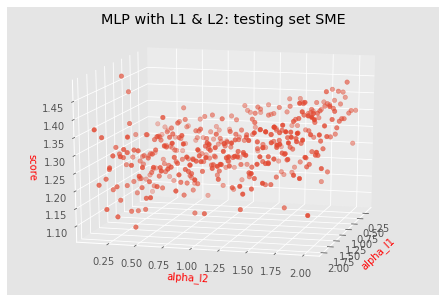

In [96]:
# plot the result of MLP with L1&L2 regularization
%matplotlib inline
fig = plt.figure()
ax = Axes3D(fig)

plt.rcParams['axes.unicode_minus']=False # to make "-" show normally

# plotting
surf = ax.scatter(l1_l2_param_test[0],l1_l2_param_test[1],l1_l2_param_test[3],cmap="Blues")
ax.view_init(elev=15, azim=15)

# setting title and labels
plt.title('MLP with L1 & L2: testing set SME')
ax.set_zlabel('score', fontdict={'size': 10, 'color': 'red'})
ax.set_ylabel('alpha_l2', fontdict={'size': 10, 'color': 'red'})
ax.set_xlabel('alpha_l1', fontdict={'size': 10, 'color': 'red'})

### ================ Grid search for other parameters ===================

In [117]:
param_train = [[],[],[],[]]   # alpha_l1, alpha_l2, score_l1_l2_R2, score_l1_l2_RME
param_test = [[],[],[],[]]   # alpha_l1, alpha_l2, score_l1_l2_R2, score_l1_l2_RME

expected_x = y_train
expected_y = y_test

# here, we test two different hidden layer sizes and three diffrent solvers
# hidden_layer_sizes: (100,), (100, 30)
# solver: 'adam', 'sgd', 'lbfgs'
# the value of alpha_l1 and alpha_l2 are from the well-trained model before

for hidden_layer_sizes in [(100,), (100, 30)]:
    for solver in ['adam', 'sgd', 'lbfgs']:
        MLP = MLPRegressor(alpha_l1=1.8, alpha_l2=0.4, 
                                 hidden_layer_sizes=hidden_layer_sizes, solver=solver)
        MLP.fit(X_train, y_train)
        
        # training set
        predicted_x = MLP.predict(X_train)
        s_train_r2 = metrics.r2_score(expected_x, predicted_x)
        s_train_mse = metrics.mean_squared_error(expected_x, predicted_x)
        # append training result to the param_train list
        param_train[0].append(hidden_layer_sizes)
        param_train[1].append(solver)
        param_train[2].append(s_train_r2)
        param_train[3].append(s_train_mse)

        # testing set
        predicted_y = MLP.predict(X_test)
        s_test_r2 = metrics.r2_score(expected_y, predicted_y)
        s_test_mse = metrics.mean_squared_error(expected_y, predicted_y)
        # append testing result to the param_test list
        param_test[0].append(hidden_layer_sizes)
        param_test[1].append(solver)
        param_test[2].append(s_test_r2)
        param_test[3].append(s_test_mse)

In [118]:
# print the result of MLP
param_test = np.array(param_test)
# get the index of minimum mse
a_test = np.argmin(param_test, axis=1)
# print(a_test)
print('The best result for MLP:')
print('alpha_l1 = {} \nalpha_l2 = {}'.format(1.8, 0.4))
print('hidden_layer_sizes = {} \nsolver = {} \nR^2 = {} \nMSE = {}'
      .format(param_test[0][a_test[3]], param_test[1][a_test[3]], 
              param_test[2][a_test[3]], param_test[3][a_test[3]]))

The best result for MLP:
alpha_l1 = 1.8 
alpha_l2 = 0.4
hidden_layer_sizes = (100,) 
solver = lbfgs 
R^2 = 0.4933123949718302 
MSE = 1.1056302571093028


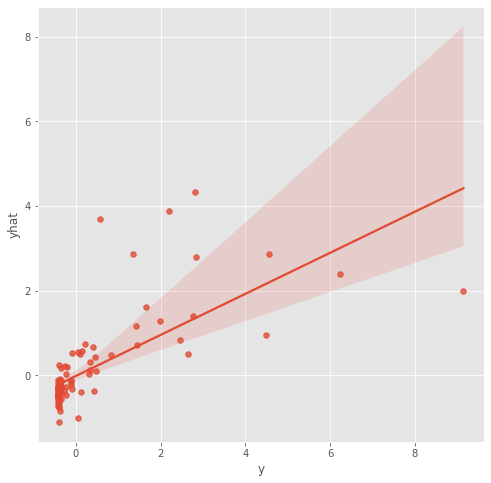

In [119]:
# utilizing the trained parameters
MLP_op = MLPRegressor(alpha_l1=1.8, alpha_l2=0.4, hidden_layer_sizes=(100,), solver='lbfgs')
MLP_op.fit(X_train, y_train)
expected_op_y = y_test
predicted_op_y = MLP_op.predict(X_test)

# plot the fitting diagram of y and yhat on testing dataset
plt.figure(figsize=(8, 8))
plt.xlabel("y")
plt.ylabel("yhat")
sns.regplot(expected_op_y, predicted_op_y, fit_reg=True, scatter_kws={"s": 30})

### k-fold validation
- Below show the k-fold (k=5 & k=10) cross validation for the MLP_op model.
- In the previous experiment, the whole data set was divided into training set and test set, so it was no longer necessary to use k-fold for validation. 
- The results below are only for the purpose of showing the results of model training.

In [120]:
# K-fold cross validation  k = 5
print('k-fold cross validation:\n')
scores_5 = []
scores_5 = cross_val_score(MLP_op, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=1)
print('MSE Loss for k = 5:\n %s\n'% scores_5)

# neg_mean_squared_error return the negative mse, but mse should be a positive number
# fix the sign of MSE scores
mse_scores_5 = -scores_5

print ('Fixed MSE Loss for k = 5:\n %s\n'% mse_scores_5)
print('In conclusion: MSE Loss for k = 5: %3f +/- %3f'% (np.mean(mse_scores_5), np.std(mse_scores_5)))

k-fold cross validation:

MSE Loss for k = 5:
 [-0.91667495 -1.95485589 -1.25633376 -0.34062325 -1.0031958 ]

Fixed MSE Loss for k = 5:
 [0.91667495 1.95485589 1.25633376 0.34062325 1.0031958 ]

In conclusion: MSE Loss for k = 5: 1.094337 +/- 0.524345


In [121]:
# K-fold cross validation  k = 10
print('k-fold cross validation:\n')
scores_10 = []
scores_10 = cross_val_score(MLP_op, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=1)
print('MSE Loss for k = 10:\n %s\n'% scores_10)

# neg_mean_squared_error return the negative mse, but mse should be a positive number
# fix the sign of MSE scores
mse_scores_10 = -scores_10

print ('Fixed MSE Loss for k = 10:\n %s\n'% mse_scores_10)
print('In conclusion: MSE Loss for k = 10: %3f +/- %3f'% (np.mean(mse_scores_10), np.std(mse_scores_10)))

k-fold cross validation:

MSE Loss for k = 10:
 [-0.09289169 -1.64047051 -0.84794916 -0.53713239 -0.13847821 -2.29617538
 -0.44901969 -0.53163352 -1.88527077 -0.27370906]

Fixed MSE Loss for k = 10:
 [0.09289169 1.64047051 0.84794916 0.53713239 0.13847821 2.29617538
 0.44901969 0.53163352 1.88527077 0.27370906]

In conclusion: MSE Loss for k = 10: 0.869273 +/- 0.745383
